In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [4]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.0 KB


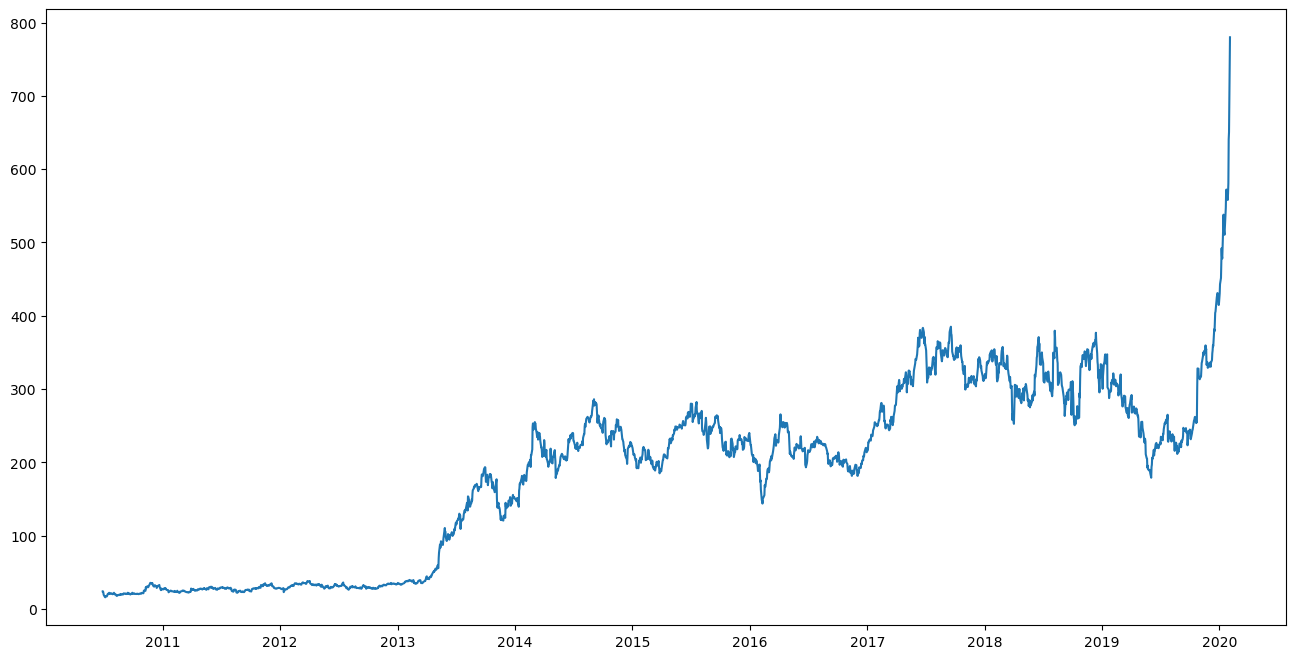

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price histroy')
plt.show(1)

In [7]:
data=df.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

new_dataset = data[['Date','Close']].reset_index(drop=True)

In [8]:
new_dataset.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [9]:
new_dataset.shape


(2416, 2)

In [10]:
new_dataset.describe()

,Date,Close
count,2416,2416.000000
mean,2015-04-15 11:09:56.026490112,186.403651
min,2010-06-29 00:00:00,15.800000
25%,2012-11-19 18:00:00,34.400002
50%,2015-04-16 12:00:00,212.960007
75%,2017-09-07 06:00:00,266.774994
max,2020-02-03 00:00:00,780.000000
std,NaN,119.136020


In [11]:
print(new_dataset.index)


if 'Date' in new_dataset.columns:
    new_dataset.drop("Date", axis=1, inplace=True)

    print(new_dataset.head())
print(new_dataset.columns)

RangeIndex(start=0, stop=2416, step=1)
       Close
0  23.889999
1  23.830000
2  21.959999
3  19.200001
4  16.110001
Index(['Close'], dtype='object')


In [12]:
# split
train_data = new_dataset[:987]
valid_data = new_dataset[987:]

# scale only on train data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_data = scaler.fit_transform(train_data)

x_train_data, y_train_data = [], []

for i in range(60,len(scaled_train_data)):
  x_train_data.append(scaled_train_data[i-60:i,0])
  y_train_data.append(scaled_train_data[i,0])


x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0],x_train_data.shape[1],1))

In [13]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=150,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
LSTM_model.add(Dense(1))

inputs_data = new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data = inputs_data.reshape(-1,1)
inputs_data = scaler.transform(inputs_data)

LSTM_model.compile(loss='mean_squared_error',optimizer='adam')
LSTM_model.fit(x_train_data,y_train_data,epochs=5,batch_size=2,verbose=2)

Epoch 1/5


C:\Users\yash1\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\yash1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


464/464 - 8s - 17ms/step - loss: 0.0584
Epoch 2/5
464/464 - 6s - 14ms/step - loss: 0.0590
Epoch 3/5
464/464 - 6s - 14ms/step - loss: 0.0584
Epoch 4/5
464/464 - 6s - 14ms/step - loss: 0.0565
Epoch 5/5
464/464 - 6s - 14ms/step - loss: 0.0580


In [14]:
X_test=[]
# Adjust the range to start from 60 to create sequences of length 60
for i in range(60, len(inputs_data)):
  X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=LSTM_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price.reshape(-1, 1))
# Take the last len(valid_data) predictions to match the length of valid_data
predicted_closing_price = predicted_closing_price[len(predicted_closing_price) - len(valid_data):]

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [15]:
LSTM_model.save("saved_model.h5")

In [16]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"], label ="Training Data (Actual)", color ='blue')
plt.plot(valid_data["Close"], label ="Validation Data (Actual)", color ='green')
plt.plot(valid_data["Predictions"], label ="Validation Data (Predicted)", color ='red')
plt.legend()

C:\Users\yash1\AppData\Local\Temp\ipykernel_16788\686040361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


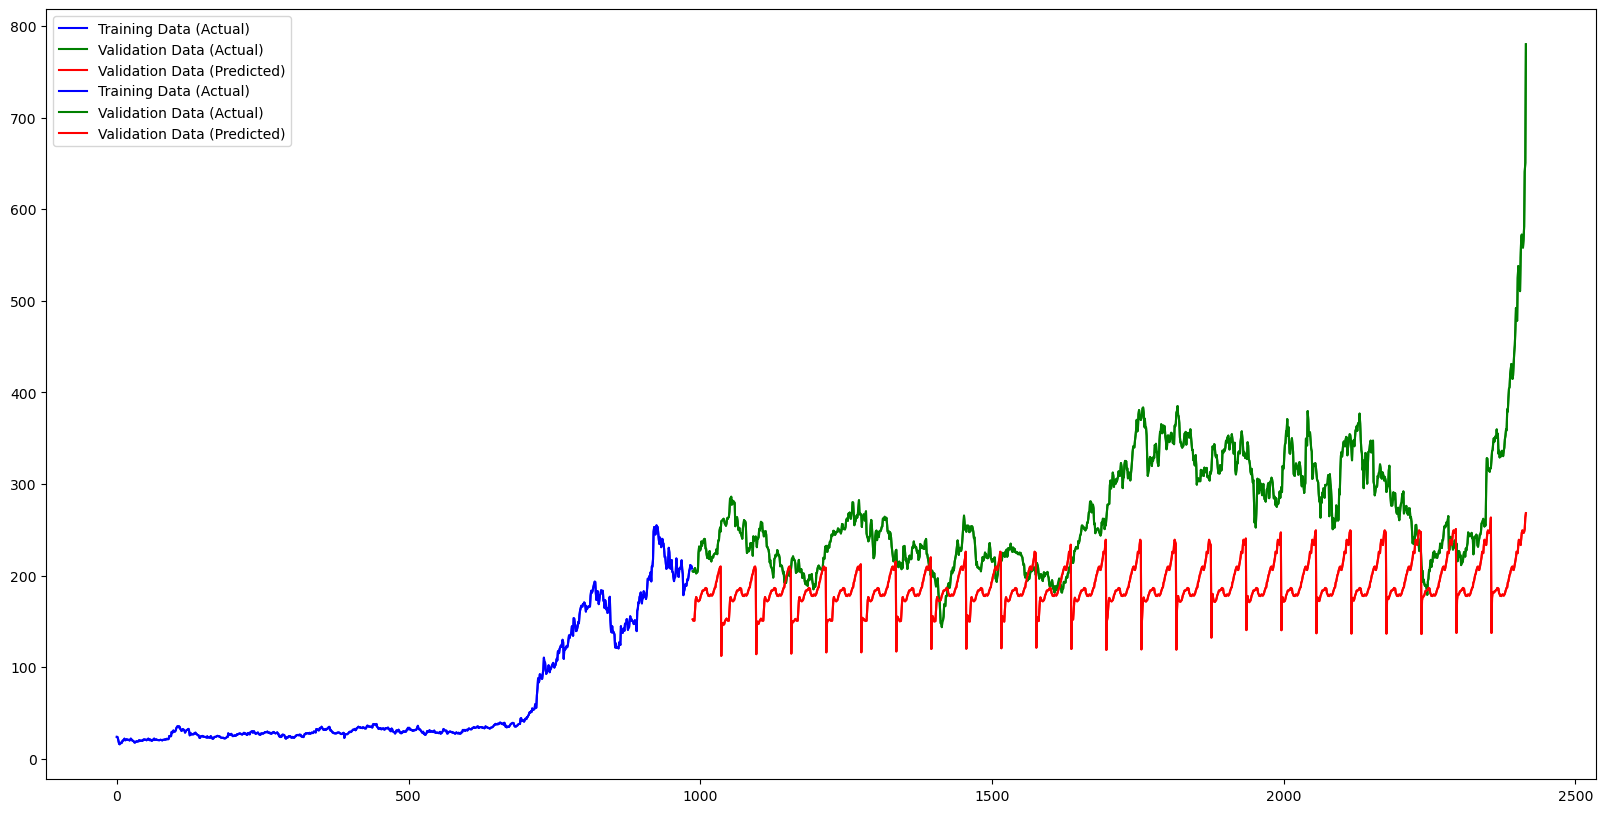

In [17]:
plt.plot(train_data["Close"], label ="Training Data (Actual)", color ='blue')
plt.plot(valid_data["Close"], label ="Validation Data (Actual)", color ='green')
plt.plot(valid_data["Predictions"], label ="Validation Data (Predicted)", color ='red')
plt.legend()
plt.show()